In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\Zloy\\mlcours\\telecom_churn.csv")

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


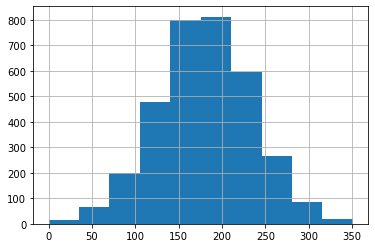

In [6]:
df['Total day minutes'].hist();

C:\Users\Zloy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


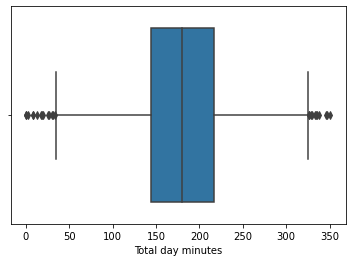

In [7]:
sb.boxplot(df['Total day minutes']);

C:\Users\Zloy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

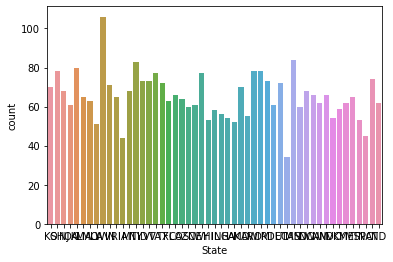

In [8]:
 sb.countplot(df['State'])

C:\Users\Zloy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

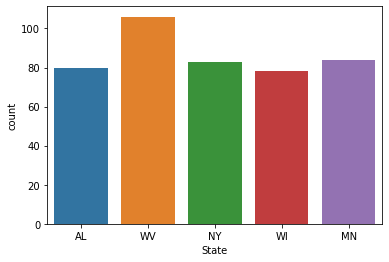

In [14]:
sb.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State'])

C:\Users\Zloy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


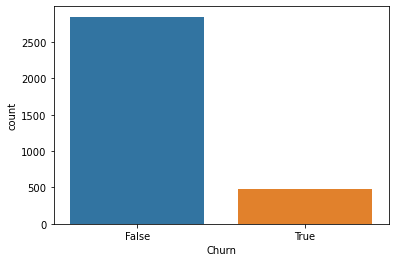

In [16]:
sb.countplot(df['Churn']);

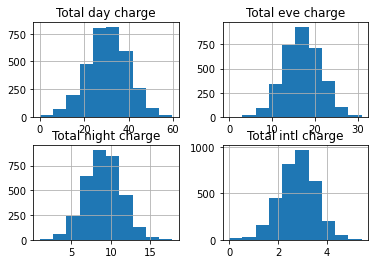

In [17]:
featrs = [f for f in df.columns if 'charge' in f]
df[featrs].hist();

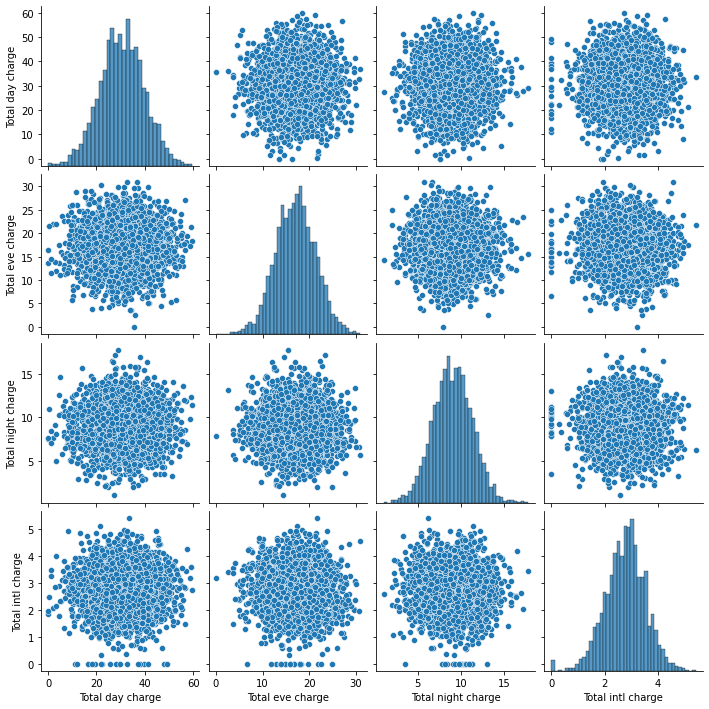

In [18]:
sb.pairplot(df[featrs]);

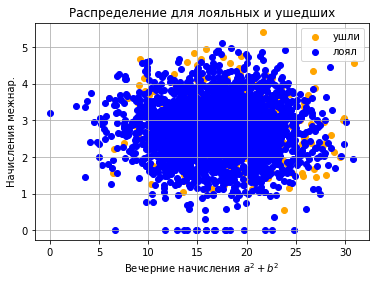

In [35]:
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'], 
            color='orange', label='ушли')
plt.scatter(df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'], 
            color='blue', label='лоял')
plt.xlabel('Вечерние начисления $ a^2 + b^2$')
plt.ylabel('Начисления межнар.')
plt.grid()
plt.title('Распределение для лояльных и ушедших')
plt.legend()

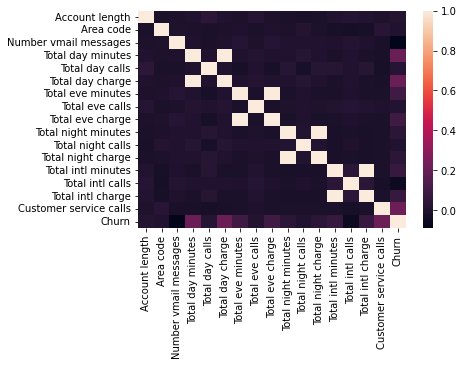

In [37]:
sb.heatmap(df.corr());

In [41]:
df.drop(featrs, axis=1, inplace=True)


In [42]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

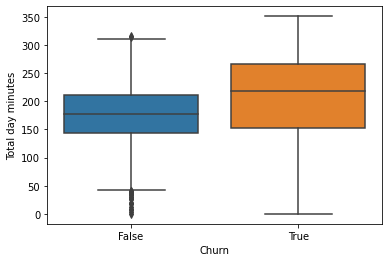

In [44]:
sb.boxplot(x='Churn', y='Total day minutes', data=df);

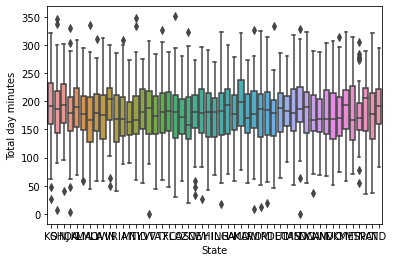

In [45]:
sb.boxplot(x='State', y='Total day minutes', data=df);

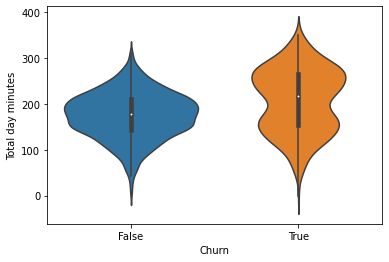

In [46]:
sb.violinplot(x='Churn', y='Total day minutes', data=df);

In [48]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

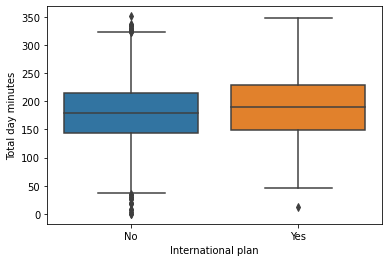

In [49]:
sb.boxplot(x='International plan', y='Total day minutes', data=df);

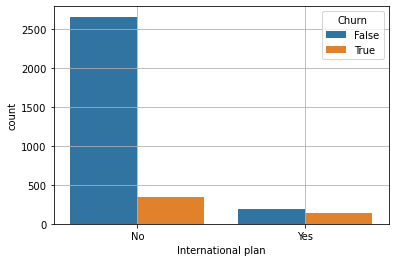

In [52]:
sb.countplot(x='International plan', hue='Churn', data=df);
plt.grid()

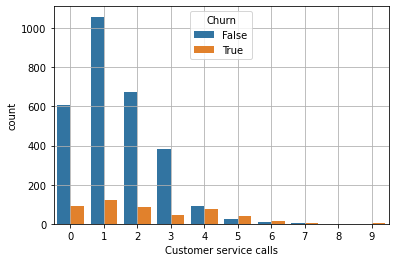

In [53]:
sb.countplot(x='Customer service calls', hue='Churn', data=df);
plt.grid()

In [55]:
from sklearn.manifold import TSNE

In [58]:
tsne = TSNE(random_state=0)

In [60]:
df2 = df.drop('State', axis=1)
df2['International plan'] = df2['International plan'].map({'Yes': 1, 'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [63]:
%%time
tsne.fit(df2)

C:\Users\Zloy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Zloy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 1min 51s
Wall time: 20.4 s


TSNE(random_state=0)

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
 14  Churn                   3333 non-null   

In [65]:
tsne.embedding_.shape

(3333, 2)

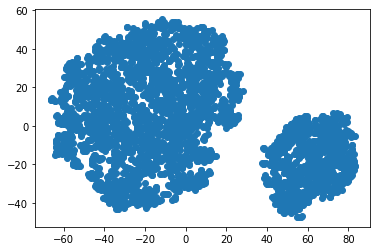

In [66]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

In [68]:
df2['Churn'].values

array([False, False, False, ..., False, False, False])

In [75]:
tsne.embedding_[df2['Churn'].values, 0]

array([-7.65552330e+00, -6.35560951e+01,  2.14286423e+01, -3.34383583e+01,
       -2.06396656e+01, -3.20636406e+01, -1.61281312e+00,  1.66045628e+01,
        6.15016441e+01, -5.54265671e+01,  2.60322113e+01,  8.11844101e+01,
       -1.27430096e+01, -4.80334015e+01, -2.74708347e+01, -4.58468628e+01,
       -1.71412354e+01,  6.43117599e+01, -5.84541588e+01,  6.70818472e+00,
        5.58714447e+01,  2.43075514e+00, -6.41942673e+01,  8.89977837e+00,
        7.92118835e+01,  7.68757553e+01,  6.43768616e+01, -5.97357292e+01,
       -4.82342567e+01,  5.24901962e+01,  1.76305408e+01, -1.12592964e+01,
        5.23666739e-01,  2.14436073e+01, -3.72579288e+00,  7.43315887e+01,
        1.04150877e+01, -5.35123749e+01, -1.43763399e+01, -5.33260612e+01,
       -5.68556671e+01, -5.83368149e+01,  6.59567032e+01, -5.94924545e+01,
       -6.59757805e+00, -1.95558910e+01,  4.75582848e+01, -5.80175972e+01,
       -6.29523582e+01, -5.94300804e+01, -2.75516243e+01, -1.90920887e+01,
        7.23148346e+01, -

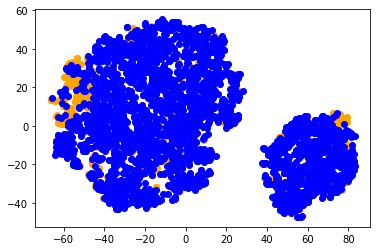

In [76]:
plt.scatter(tsne.embedding_[df2['Churn'].values, 0], tsne.embedding_[df2['Churn'].values, 1], color='orange');
plt.scatter(tsne.embedding_[~df2['Churn'].values, 0], tsne.embedding_[~df2['Churn'].values, 1], color='blue')

In [77]:
poll_data = pd.read_csv("C://Users//Zloy//mlcours/mlcourse_open_first_survey_parsed.csv", index_col='id')

In [79]:
poll_data.head()

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN
